## 1. Îç∞Ïù¥ÌÑ∞ÏÖã Íµ¨ÏÑ±ÌïòÍ∏∞

In [1]:
import os
import glob
import time

import PIL
import imageio
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline

### 1.1 CIFAR-10 Îç∞Ïù¥ÌÑ∞ÏÖã Î∂àÎü¨Ïò§Í∏∞

In [2]:
cifar10 = tf.keras.datasets.cifar10

(train_x, _), (test_x, _) = cifar10.load_data()

train_x.shape

170508288/170498071 [==============================] - 3s 0us/step


(50000, 32, 32, 3)

### 1.2 Ïù¥ÎØ∏ÏßÄ Ï†ïÍ∑úÌôî

In [3]:
print("max pixel:", train_x.max())
print("min pixel:", train_x.min())

max pixel: 255
min pixel: 0


In [4]:
train_x = (train_x - 127.5) / 127.5 # Ïù¥ÎØ∏ÏßÄÎ•º [-1, 1]Î°ú Ï†ïÍ∑úÌôîÌï©ÎãàÎã§.

print("max pixel:", train_x.max())
print("min pixel:", train_x.min())

max pixel: 1.0
min pixel: -1.0


In [5]:
train_x.shape

(50000, 32, 32, 3)

### 1.3 Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


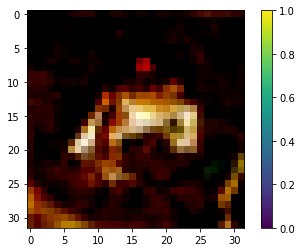

In [6]:
plt.imshow(train_x[0].reshape(32, 32, 3))
plt.colorbar()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

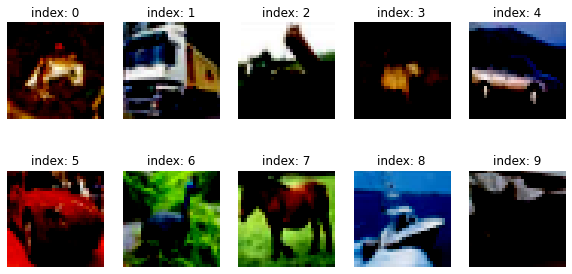

In [7]:
plt.figure(figsize=(10, 5))

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_x[i].reshape(32, 32, 3))
    plt.title(f'index: {i}')
    plt.axis('off')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

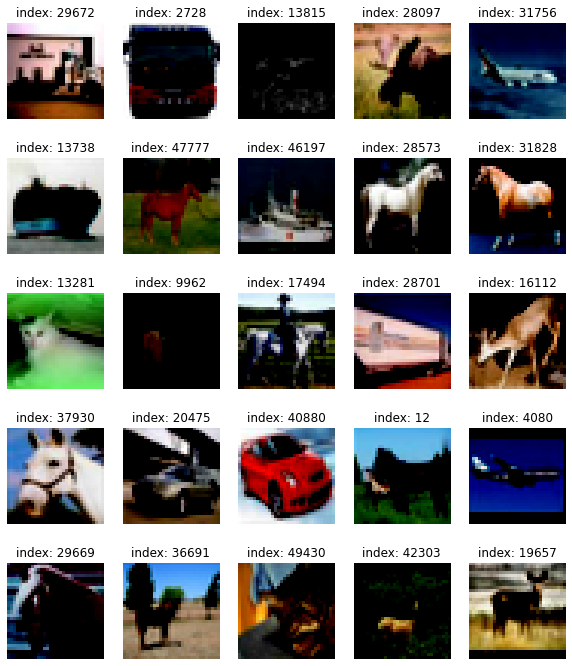

In [8]:
plt.figure(figsize=(10, 12))

for i in range(25):
    plt.subplot(5, 5, i+1)
    random_index = np.random.randint(1, 50000)
    plt.imshow(train_x[random_index].reshape(32, 32, 3))
    plt.title(f'index: {random_index}')
    plt.axis('off')
plt.show()

### 1.4 ÎØ∏ÎãàÎ∞∞Ïπò Îç∞Ïù¥ÌÑ∞ÏÖã Íµ¨ÏÑ±

In [9]:
BUFFER_SIZE = 50000
BATCH_SIZE = 256

In [10]:
train_dataset = tf.data.Dataset.from_tensor_slices(train_x).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

## 2. ÏÉùÏÑ±Ïûê Î™®Îç∏ Íµ¨ÌòÑÌïòÍ∏∞

### 2.1 ÏÉùÏÑ±Ïûê Î™®Îç∏ Íµ¨ÌòÑ Ìï®Ïàò

In [11]:
def make_generator_model():
    
    # Start
    model = tf.keras.Sequential()
    
    # First: Dense layer
    model.add(layers.Dense(4*4*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU(alpha=0.2))
    
    # Second: Reshape layer
    model.add(layers.Reshape((4, 4, 256)))
    
    # Third: Conv2DTranspose layer
    model.add(layers.Conv2DTranspose(128, kernel_size=(4, 4), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.LeakyReLU(alpha=0.2))
    
    # Fourth: Conv2DTranspose layer
    model.add(layers.Conv2DTranspose(128, kernel_size=(4, 4), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.LeakyReLU(alpha=0.2))
    
    # Fifth: Conv2DTranspose layer
    model.add(layers.Conv2DTranspose(128, kernel_size=(4, 4), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.LeakyReLU(alpha=0.2))
    
    # Sixth: Conv2DTranspose layer
    model.add(layers.Conv2DTranspose(3, kernel_size=(3, 3), padding='same', use_bias=False, \
                                     activation='tanh'))
    
    return model

In [12]:
generator = make_generator_model()

generator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4096)              409600    
_________________________________________________________________
batch_normalization (BatchNo (None, 4096)              16384     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 4096)              0         
_________________________________________________________________
reshape (Reshape)            (None, 4, 4, 256)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 8, 8, 128)         524288    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 16, 16, 128)       2

### 2.2 ÎûúÎç§ Ïù¥ÎØ∏ÏßÄ ÏÉùÏÑ±

In [13]:
noise = tf.random.normal([1, 100])

In [14]:
generated_image = generator(noise, training=False)
generated_image.shape

TensorShape([1, 32, 32, 3])

### 2.3 ÏÉùÏÑ±Îêú ÎûúÎç§ Ïù¥ÎØ∏ÏßÄ ÌôïÏù∏

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


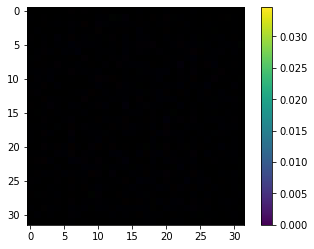

In [15]:
plt.imshow(generated_image[0, :, :, :])
plt.colorbar()
plt.show()

## 3. ÌåêÎ≥ÑÏûê Î™®Îç∏ Íµ¨ÌòÑÌïòÍ∏∞

### 3.1 ÌåêÎ≥ÑÏûê Î™®Îç∏ Íµ¨ÌòÑ Ìï®Ïàò

In [16]:
def make_discriminator_model():
    
    # Start
    model = tf.keras.Sequential()
    
    # First: Conv2D Layer
    model.add(layers.Conv2D(64, (3, 3), strides=(2, 2), padding='same', input_shape=[32, 32, 3]))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dropout(0.3))
    
    # Second: Conv2D Layer
    model.add(layers.Conv2D(128, (3, 3), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dropout(0.3))
    
    # Third: Conv2D Layer
    model.add(layers.Conv2D(128, (3, 3), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dropout(0.3))
    
    # Fourth: Conv2D Layer
    model.add(layers.Conv2D(256, (3, 3), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dropout(0.3))
    
    # Fifth: Flatten Layer
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.4))
    
    # Sixth: Dense Layer
    model.add(layers.Dense(1))
    
    return model

In [17]:
discriminator = make_discriminator_model()

discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 16, 16, 64)        1792      
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 16, 16, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 8, 8, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)        

### 3.2 ÏÉùÏÑ±Ìïú ÎûúÎç§ Ïù¥ÎØ∏ÏßÄ ÌôïÏù∏

In [18]:
decision = discriminator(generated_image, training=False)
decision

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.00030441]], dtype=float32)>

## 4. ÏÜêÏã§Ìï®ÏàòÏôÄ ÏµúÏ†ÅÌôî Ìï®Ïàò Íµ¨ÌòÑÌïòÍ∏∞

### 4.1 ÏÜêÏã§Ìï®Ïàò Íµ¨ÌòÑ

In [19]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [20]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [21]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

### 4.2 Ï†ïÌôïÎèÑ Í≥ÑÏÇ∞ Ìï®Ïàò Íµ¨ÌòÑ

In [22]:
def discriminator_accuracy(real_output, fake_output):
    real_accuracy = tf.reduce_mean(tf.cast(tf.math.greater_equal(real_output, tf.constant([0.5])), tf.float32))
    fake_accuracy = tf.reduce_mean(tf.cast(tf.math.less(fake_output, tf.constant([0.5])), tf.float32))
    return real_accuracy, fake_accuracy

### 4.3 Optimizer Ï†ïÏùò

In [23]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [24]:
noise_dim = 100
num_examples_to_generate = 16

seed = tf.random.normal([num_examples_to_generate, noise_dim])
seed.shape

TensorShape([16, 100])

## 5. ÌõàÎ†®Í≥ºÏ†ï ÏÉÅÏÑ∏ Í∏∞Îä• Íµ¨ÌòÑÌïòÍ∏∞

### 5.1 ÎØ∏ÎãàÎ∞∞Ïπò ÌõàÎ†® Í≥ºÏ†ïÏùÑ Ï≤òÎ¶¨ÌïòÎäî Ìï®Ïàò Íµ¨ÌòÑ

In [25]:
@tf.function
def train_step(images):  #(1) ÏûÖÎ†•Îç∞Ïù¥ÌÑ∞
    noise = tf.random.normal([BATCH_SIZE, noise_dim])  #(2) ÏÉùÏÑ±Ïûê ÏûÖÎ†• ÎÖ∏Ïù¥Ï¶à

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:  #(3) tf.GradientTape() Ïò§Ìîà
        generated_images = generator(noise, training=True)  #(4) generated_images ÏÉùÏÑ±

        #(5) discriminator ÌåêÎ≥Ñ
        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        #(6) loss Í≥ÑÏÇ∞
        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

        #(7) accuracy Í≥ÑÏÇ∞
        real_accuracy, fake_accuracy = discriminator_accuracy(real_output, fake_output) 
    
    #(8) gradient Í≥ÑÏÇ∞
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    #(9) Î™®Îç∏ ÌïôÏäµ
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return gen_loss, disc_loss, real_accuracy, fake_accuracy  #(10) Î¶¨ÌÑ¥Í∞í

### 5.2 ÌõàÎ†® Í≥ºÏ†ï ÎèôÏïà ÏÉùÏÑ±Ìïú Ïù¥ÎØ∏ÏßÄ ÏãúÍ∞ÅÌôî Ìï®Ïàò Íµ¨ÌòÑ

In [26]:
def generate_and_save_images(model, epoch, it, sample_seeds):

    predictions = model(sample_seeds, training=False)

    fig = plt.figure(figsize=(4, 4))
    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        plt.imshow(predictions[i])
        plt.axis('off')
   
    plt.savefig('{}/aiffel/dcgan_newimage/cifar10/generated_samples/sample_epoch_{:04d}_iter_{:03d}.png'
                    .format(os.getenv('HOME'), epoch, it))

    plt.show()

### 5.3 accuracy ÌûàÏä§ÌÜ†Î¶¨ ÏãúÍ∞ÅÌôî Ìï®Ïàò Íµ¨ÌòÑ

In [27]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 15    # matlab Ï∞®Ìä∏Ïùò Í∏∞Î≥∏ ÌÅ¨Í∏∞Î•º 15,6ÏúºÎ°ú ÏßÄÏ†ïÌï¥ Ï§çÎãàÎã§.

def draw_train_history(history, epoch):
    # summarize history for loss  
    plt.subplot(211)  
    plt.plot(history['gen_loss'])  
    plt.plot(history['disc_loss'])  
    plt.title('model loss')  
    plt.ylabel('loss')  
    plt.xlabel('batch iters')  
    plt.legend(['gen_loss', 'disc_loss'], loc='upper left')  

    # summarize history for accuracy  
    plt.subplot(212)  
    plt.plot(history['real_accuracy'])
    plt.plot(history['fake_accuracy']) 
    plt.title('discriminator accuracy')  
    plt.ylabel('accuracy')  
    plt.xlabel('batch iters')  
    plt.legend(['real_accuracy', 'fake_accuracy'], loc='upper left')  
    
    # training_history ÎîîÎ†âÌÜ†Î¶¨Ïóê epochÎ≥ÑÎ°ú Í∑∏ÎûòÌîÑÎ•º Ïù¥ÎØ∏ÏßÄ ÌååÏùºÎ°ú Ï†ÄÏû•Ìï©ÎãàÎã§.
    plt.savefig('{}/aiffel/dcgan_newimage/cifar10/training_history/train_history_{:04d}.png'
                    .format(os.getenv('HOME'), epoch))
    plt.show()

### 5.4 checkpoint Î™®Îìà ÏÑ§Ï†ï

In [28]:
checkpoint_dir = os.getenv('HOME')+'/aiffel/dcgan_newimage/cifar10/training_checkpoints'

checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

## 6. ÌïôÏäµ Í≥ºÏ†ï ÏßÑÌñâÌïòÍ∏∞

### 6.1 Î™®Îç∏ ÌïôÏäµ ÏßÑÌñâ

In [29]:
def train(dataset, epochs, save_every):
    start = time.time()
    history = {'gen_loss':[], 'disc_loss':[], 'real_accuracy':[], 'fake_accuracy':[]}

    for epoch in range(epochs):
        epoch_start = time.time()
        for it, image_batch in enumerate(dataset):
            gen_loss, disc_loss, real_accuracy, fake_accuracy = train_step(image_batch)
            history['gen_loss'].append(gen_loss)
            history['disc_loss'].append(disc_loss)
            history['real_accuracy'].append(real_accuracy)
            history['fake_accuracy'].append(fake_accuracy)

            if it % 50 == 0:
                display.clear_output(wait=True)
                generate_and_save_images(generator, epoch+1, it+1, seed)
                print('Epoch {} | iter {}'.format(epoch+1, it+1))
                print('Time for epoch {} : {} sec'.format(epoch+1, int(time.time()-epoch_start)))

        if (epoch + 1) % save_every == 0:
            checkpoint.save(file_prefix=checkpoint_prefix)

        display.clear_output(wait=True)
        generate_and_save_images(generator, epochs, it, seed)
        print('Time for training : {} sec'.format(int(time.time()-start)))

        draw_train_history(history, epoch)

In [30]:
save_every = 5
EPOCHS = 1000

# ÏÇ¨Ïö©Í∞ÄÎä•Ìïú GPU ÎîîÎ∞îÏù¥Ïä§ ÌôïÏù∏
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

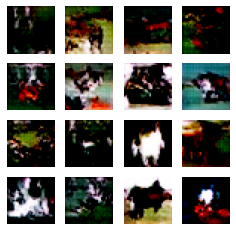

Time for training : 27807 sec


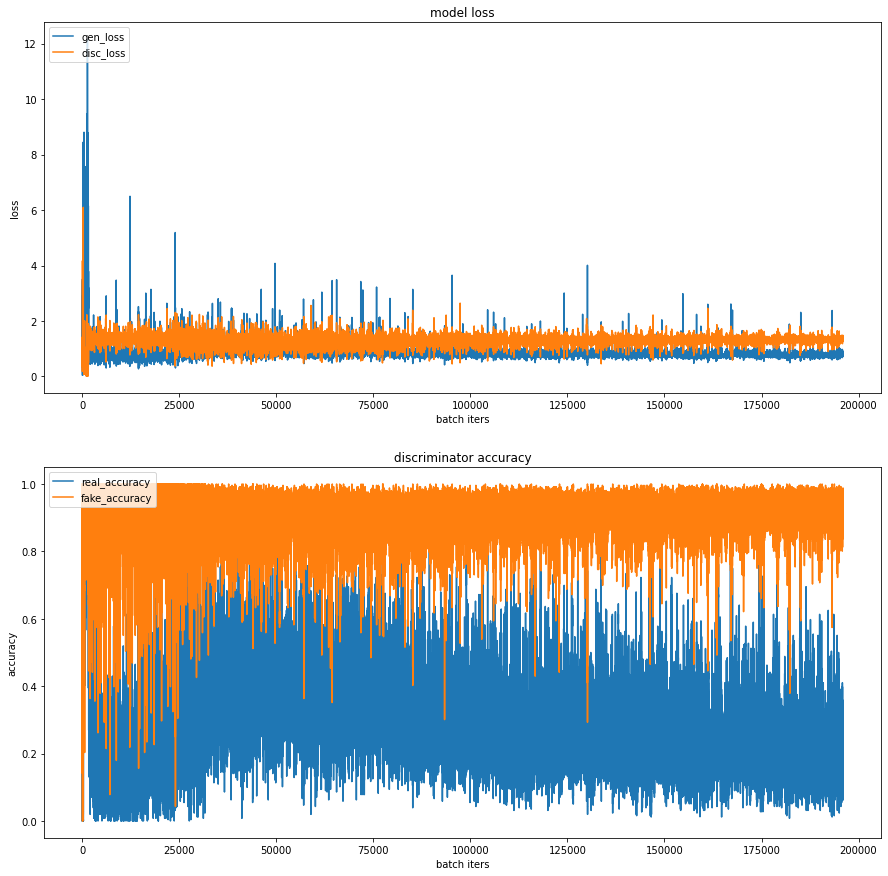

CPU times: user 7h 44min 42s, sys: 28min 27s, total: 8h 13min 10s
Wall time: 7h 43min 38s


In [31]:
%%time
train(train_dataset, EPOCHS, save_every)

### 6.2 ÌïôÏäµ ÏßÑÌñâ Í≥ºÏ†ï ÏãúÍ∞ÅÌôî

In [32]:
# ÌïôÏäµÍ≥ºÏ†ï ÏãúÍ∞ÅÌôîÌïòÍ∏∞
anim_file = os.getenv('HOME')+'/aiffel/dcgan_newimage/cifar10/cifar10_6.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
    filenames = glob.glob('{}/aiffel/dcgan_newimage/cifar10/generated_samples/sample*.png'.format(os.getenv('HOME')))
    filenames = sorted(filenames)
    last = -1
    for i, filename in enumerate(filenames):
        frame = 2*(i**0.5)
        if round(frame) > round(last):
            last = frame
        else:
            continue
        image = imageio.imread(filename)
        writer.append_data(image)
    image = imageio.imread(filename)
    writer.append_data(image)

!ls -l ~/aiffel/dcgan_newimage/cifar10/cifar10_6.gif

-rw-r--r-- 1 root root 5307693 Feb 14 09:49 /aiffel/aiffel/dcgan_newimage/cifar10/cifar10_6.gif


### 6.3 ÏÉòÌîå Ïù¥ÎØ∏ÏßÄ, Í∑∏ÎûòÌîÑ Ïù¥ÎØ∏ÏßÄ

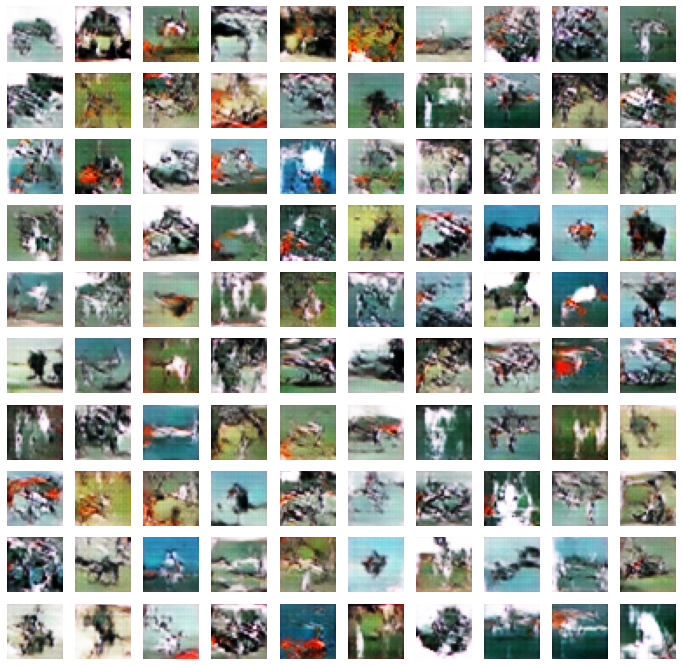

In [33]:
# checkpointÎ•º ÌÜµÌï¥ Î™®Îç∏ Î°úÎìú
checkpoint_dir = os.getenv('HOME')+'/dcgan_newimage/cifar10/training_checkpoints'

latest = tf.train.latest_checkpoint(checkpoint_dir)
checkpoint.restore(latest)

generator = checkpoint.generator
discriminator = checkpoint.discriminator

# Î°úÎìúÌïú Î™®Îç∏Ïù¥ Ï†ïÏÉÅÏ†ÅÏúºÎ°ú Ïù¥ÎØ∏ÏßÄÎ•º ÏÉùÏÑ±ÌïòÎäîÏßÄ ÌôïÏù∏Ìï¥ Î¥ÖÎãàÎã§.
plt.figure(figsize=(12, 12))

for i in range(100):
    plt.subplot(10, 10, i+1)
    noise = tf.random.normal([1, 100])
    generated_image = generator(noise, training=False)
    np_generated = generated_image.numpy()
    np_generated = (np_generated * 127.5) + 127.5   # reverse of normalization
    np_generated = np_generated.astype(int)
    plt.imshow(np_generated[0])
    plt.axis('off')
plt.show()  # Ï†ïÏÉÅÏ†ÅÏúºÎ°ú Î™®Îç∏Ïù¥ Î°úÎìúÎêòÏóàÎã§Î©¥ ÎûúÎç§ Ïù¥ÎØ∏ÏßÄÍ∞Ä ÏïÑÎãàÎùº CIFAR-10 Ïù¥ÎØ∏ÏßÄÍ∞Ä Í∑∏Î†§Ïßà Í≤ÉÏûÖÎãàÎã§.

<br><br><br><br><br><br><br><br><br><br><br><br>
# üìïÌöåÍ≥†

## Í≥ºÏ†ï

### 1. Ï∏µ Ï∂îÍ∞Ä, ÎìúÎ°≠ÏïÑÏõÉ,  stride Í∞í, Ïª§ÎÑê ÏÇ¨Ïù¥Ï¶à Î≥ÄÍ≤ΩÌïòÍ≥† ÌõàÎ†® ÌöüÏàòÎ•º ÎäòÎ¶º
Îã§Ïùå ÍπÉÌóàÎ∏åÎ•º Ï∞∏Í≥†ÌïòÏó¨ ÏΩîÎìúÎ•º ÏàòÏ†ïÌñàÎã§.<br>
https://github.com/LilPark/AIFFEL_project/blob/main/Exploration_13/%5BE-13%5DDcganCifar10.ipynb<br>
‚ÜëÎ∞ïÏ∞ΩÍ∑ºÎãòÏùò ÍπÉÌóàÎ∏å<br>

Ìï¥Îãπ ÍπÉÌóàÎ∏åÏóêÏÑúÎäî Ï∏µ Ï∂îÍ∞Ä, ÎìúÎ°≠ÏïÑÏõÉ, stride Í∞í, Ïª§ÎÑê ÏÇ¨Ïù¥Ï¶à Î≥ÄÍ≤ΩÌïú ÏÉÅÌÉúÏòÄÎäîÎç∞ Ïù¥ ÏÉÅÌÉú Í∑∏ÎåÄÎ°ú 500Ìöå ÌõàÎ†®ÏùÑ ÎßàÏ≥§Îã§.<br>
Ïù¥ÎØ∏ÏßÄÎäî Í≤∞Í≥ºÎèÑ Í¥úÏ∞ÆÍ≥† Í∑∏ÎûòÌîÑÏùò Î™®ÏñëÎèÑ ÏïàÏ†ïÏ†ÅÏù¥ÎÇò, fake accuracyÍ∞Ä 0.5Î°ú Ìñ•ÌïòÍ≥† ÏûàÎã§Í≥† ÌïòÍ∏∞ÏóêÎäî Î∂ÄÏ°±Ìïú ÎäêÎÇåÏù¥ÏóàÎã§.<br>
Í∑∏ÎûòÏÑú Ï∂îÍ∞ÄÏ†ÅÏúºÎ°ú Îã§Î•∏ Î∞©Î≤ïÎì§ÏùÑ ÏãúÎèÑÌï¥ Î≥¥Í∏∞Î°ú Í≤∞Ï†ïÌñàÎã§.<br>

<img width="700" alt="Ïù¥ÎØ∏ÏßÄ1" src="https://user-images.githubusercontent.com/96965899/153167306-0e0d49e8-e800-430c-b601-29e44f098c26.png">


<img width="700" alt="0 5 Í∑∏ÎûòÌîÑ" src="https://user-images.githubusercontent.com/96965899/153021170-2e01bba7-3411-466f-be78-00de8bdc8ec6.png">

### 2. Î∞∞ÏπòÏ†ïÍ∑úÌôîÎ•º Ïù∏Ïä§ÌÑ¥Ïä§ normÏúºÎ°ú Î∞îÍøî ÌõàÎ†®
1Î≤àÏùò Ï°∞Í±¥ÏùÑ Ïú†ÏßÄÌïú ÏÉÅÌÉúÎ°ú Î∞∞ÏπòÏ†ïÍ∑úÌôîÎ•º Ïù∏Ïä§ÌÑ¥Ïä§ normÏúºÎ°ú Î∞îÍøî ÌõàÎ†®ÌñàÎã§. <br>
Í∑∏Îü¨ÎÇò Ïù¥ÎØ∏ÏßÄ Í≤∞Í≥ºÍ∞Ä Îçî ÏïÖÌôîÎêòÏóàÎã§.<br>

### 3.  ÌôúÏÑ±Ìôî Ìï®ÏàòÎ•º adamÏóêÏÑú SGD Ìï®ÏàòÎ°ú Î≥ÄÍ≤ΩÌïòÏó¨ 1000Ìöå ÌõàÎ†®
1000Ìöå ÎèåÎ¶∞ Í≤∞Í≥ºÏπòÍ≥† Ïù¥ÎØ∏ÏßÄ Í∞úÏÑ†Ïù¥ ÎààÏóê ÎùÑÍ≤å Ïù¥Î§ÑÏßÄÏßÄ ÏïäÏïòÍ≥†, Í∑∏ÎûòÌîÑ ÏÉÅÌÉúÎäî Ïã¨Í∞ÅÌïòÍ≤å ÏïÖÌôîÎêòÏóàÎã§.<br>

<img width="700" alt="Ïù¥ÎØ∏ÏßÄ3" src="https://user-images.githubusercontent.com/96965899/153166983-940bcf9b-99c2-4819-a971-52e78980443d.png">

<img width="700" alt="0 5 Í∑∏ÎûòÌîÑ 3" src="https://user-images.githubusercontent.com/96965899/153167377-5c489c43-8c2f-4f1b-8f6a-517ed784d16c.png">

**Ï∞∏Í≥†**<br>
* ÌïòÏÑ±ÎØºÎãòÏùò ÎèÑÏõÄ

### 4. Î∞∞ÏπòÏÇ¨Ïù¥Ï¶àÎ•º 256ÏóêÏÑú 128Î°ú Ï§ÑÏù¥Í≥† 500Ìöå ÌõàÎ†®
ÎÇòÏùò Í≤ΩÌóòÍ≥º ÎèôÎ£åÎì§Ïùò ÏùòÍ≤¨ÏùÑ Ï∑®Ìï©Ìïú Í≤∞Í≥º ÌõàÎ†® ÌöüÏàòÎ•º 500Ìöå Ïù¥ÏÉÅÏúºÎ°ú ÎäòÎ¶¨Îäî Í≤ÉÏùÄ ÏùòÎØ∏Í∞Ä ÏóÜÎã§Í≥† Í≤∞Î°†ÏßÄÏóàÎã§.<br>
ÏÑ±Îä• Í∞úÏÑ†Ïù¥ ÏûàÏóàÎçò ÎèôÎ£åÎì§Ïùò Ï°∞Ïñ∏ÏùÑ Ï∞∏Í≥†ÏÇºÏïÑ 3Î≤àÏùò ÏÉÅÌÉúÏóêÏÑú Î∞∞ÏπòÏÇ¨Ïù¥Ï¶àÎ•º 256ÏóêÏÑú 128Î°ú Ï§ÑÏù¥Í≥† ÌõàÎ†® ÌöüÏàòÎ•º 500Ìöå ÏãúÎèÑÌñàÎã§.<br>
Ïù¥ÎØ∏ÏßÄ Í≤∞Í≥ºÎäî 2Î≤àÏß∏ Î≥¥Îã§Îäî Ï¢ãÏßÄÎßå Ï≤´Î≤àÏß∏ Î∞©Î≤ïÍ≥º ÎπÑÏä∑Ìïú Ï†ïÎèÑÏù¥Îã§. <br>
Í∑∏ÎûòÌîÑÎäî Ï≤´Î≤àÏß∏Í∞Ä Îçî Ï¢ãÏïòÎã§.<br>
Î∞∞ÏπòÏÇ¨Ïù¥Ï¶àÎ•º Ï§ÑÏù∏ Í≤ÉÏù¥ Ìö®Í≥ºÍ∞Ä ÏûàÎã§Í≥† ÎßêÌïòÍ∏∞Ïóê Î∂ÄÏ°±ÌïòÎã§Îäî ÏÉùÍ∞ÅÏóê Ï≤´Î≤àÏß∏ ÏÉÅÌÉúÎ°ú ÎèåÏïÑÍ∞Ä Î∞∞ÏπòÏÇ¨Ïù¥Ï¶àÎßå Ï°∞Ï†àÌïú ÏÉÅÌÉúÎ°ú ÌõàÎ†®ÌïòÍ∏∞Î°ú Í≤∞Ï†ïÌñàÎã§.<br>

<img width="700" alt="EX10" src="https://user-images.githubusercontent.com/96965899/153318862-8b55f274-d43e-4901-99cf-9ed266745ae4.png">
<img width="700" alt="0 5Í∑∏ÎûòÌîÑ" src="https://user-images.githubusercontent.com/96965899/153318934-41affe6f-055a-4441-a348-d2db2454e295.png">

    
### 5. 1Î≤àÏóêÏÑú Î∞∞ÏπòÏÇ¨Ïù¥Ï¶àÎ•º 128Î°ú Ï§ÑÏûÑ
1Î≤àÍ≥º ÌÅ∞ Ï∞®Ïù¥Îäî ÏóÜÏóàÎã§.<br>
    
<img width="700" alt="Ïù¥ÎØ∏ÏßÄ" src="https://user-images.githubusercontent.com/96965899/153360740-d0163caf-282a-4081-9b10-e3fcb48e8735.png">
<img width="700" alt="Í∑∏ÎûòÌîÑ" src="https://user-images.githubusercontent.com/96965899/153360801-9dc7568e-710a-4381-990a-c5a87b2f4e26.png">


### 6. ÌôúÏÑ±ÌôîÌï®ÏàòÎ•º ReLUÎ°ú Î∞îÍøà
DCGAN ÎÖºÎ¨∏ÏóêÏÑúÎäî ÏÉùÏÑ±ÏûêÏùò ÌôúÏÑ±Ìôî Ìï®ÏàòÎ•º LeakyReLUÍ∞Ä ÏïÑÎãàÎùº ReLUÎ•º ÏÇ¨Ïö©ÌñàÏùåÏùÑ Ï∞∏Í≥†Ìï¥ 1Î≤àÏùò ÏÉÅÌÉúÏóêÏÑú ÌôúÏÑ±ÌôîÌï®ÏàòÎ•º ReLuÎ°ú Î∞îÍæ∏Í≥† 500Ìöå ÌõàÎ†®ÏãúÏº∞Îã§. <br>(Ïù¥ Í≥ºÏ†ïÏóêÏÑú LeakyReLUÏôÄ Îã¨Î¶¨ ReLUÎäî alphaÍ∞íÏù¥ ÏóÜÏùåÏùÑ ÏïåÍ≤å ÎêòÏóàÎã§.)<br>
Í∑∏Îü∞Îç∞ ÌõàÎ†® Ï§ëÍ∞ÑÏóê Î≥¥Îãà ÏïÑÎûòÏôÄ Í∞ôÏùÄ Î™®ÏäµÏù¥Ïñ¥ÏÑú ÌïôÏäµÏùÑ Ï§ëÎã®ÌñàÎã§.<br>
    
<img width="350" alt="Î†êÎ£®Î°ú ÏàòÏ†ïÌïú Îí§" src="https://user-images.githubusercontent.com/96965899/153392291-681772f8-e593-4e90-8d60-cd80d5fc776d.png">

**Ï∞∏Í≥†**<br>
* Î∞ïÏ∞ΩÍ∑ºÎãòÏùò ÎèÑÏõÄ
    
### 7. Ïù¥ÎØ∏ÏßÄ ÌÅ¨Í∏∞Î•º 32ÏóêÏÑú 48Î°ú ÎäòÎ¶º
1Î≤àÏùò ÏÉÅÌÉúÏóêÏÑú Ïù¥ÎØ∏ÏßÄ ÌÅ¨Í∏∞Îßå Î≥ÄÍ≤ΩÌñàÎã§.<br>
Ï≤òÏùå Ïù¥ÎØ∏ÏßÄ ÌÅ¨Í∏∞Î•º 64Î°ú ÎäòÎ¶¨Îäî ÏãúÎèÑÎ•º ÌñàÏùÑ Îïå, ÏóêÌè≠Ïù¥ ÏãúÏûëÎêòÎäî ÏßÄÏ†êÏóêÏÑú Í≥ÑÏÜç Ïª§ÎÑêÏù¥ Ï£ΩÏñ¥ÏÑú ÏãúÎèÑÌï¥ Î≥º Ïàò ÏóÜÏóàÎã§.<br>

#### Ïù¥ Í≥ºÏ†ïÏóêÏÑú ÏÉùÍ∏¥ Ïò§Î•òÏôÄ Ìï¥Í≤∞Î≤ï
Ï≤òÏùåÏóê reshapeÏùò Ïà´ÏûêÎßå Î≥ÄÍ≤ΩÌñàÎäîÎç∞ ÏóêÎü¨Î©îÏÑ∏ÏßÄÍ∞Ä Îñ¥Îã§.
train_x[0]Ïùò ÌÅ¨Í∏∞Í∞Ä 32X32X3Ïù¥ÎùºÏÑú Îçî ÌÅ∞ ÌÅ¨Í∏∞Î°ú Î≥ÄÍ≤ΩÌïòÍ∏∞ ÏúÑÌï¥ÏÑúÎäî Îç∞Ïù¥ÌÑ∞ ÏûêÏ≤¥Í∞Ä ÏûëÏùÄ ÌÅ¨Í∏∞Îùº Ïù¥ÎØ∏ÏßÄÎùºÎ©¥ cv2.resizeÏ≤òÎüº ÌÅ¨Í∏∞Î•º Î≥ÄÍ≤ΩÌïòÎäî Ìï®ÏàòÎ•º Ìò∏Ï∂úÌï¥Ïïº ÌïúÎã§Îäî Í≤ÉÏùÑ ÏïåÍ≤å ÎêòÏóàÎã§.<br>
Ïï†Ï¥àÏóê Í∞ÄÏßÄÍ≥† ÏûàÎäî Îç∞Ïù¥ÌÑ∞Í∞Ä 32X32X3=3072ÎùºÏÑú 64X64X3=12288Í∞úÏùò Îç∞Ïù¥ÌÑ∞Î°ú ÌëúÌòÑÌï† ÏàòÍ∞Ä ÏóÜÍ∏∞ ÎïåÎ¨∏Ïóê Ïò§Î•òÍ∞Ä ÎÇú Í≤ÉÏù¥Îã§.<br>
ÎèôÎ£åÏôÄ ÌçºÏã§ÎãòÏùò ÎèÑÏõÄÏúºÎ°ú Î¶¨ÏÇ¨Ïù¥Ï¶à Ìï®ÏàòÎ•º ÎßåÎì§Í≥† Í∑∏Í≤ÉÏóê ÎßûÏ∂∞ Ïù¥ÎØ∏ÏßÄ ÌÅ¨Í∏∞ÏôÄ Í¥ÄÎ†®Ïù¥ ÏûàÎäî Ïà´ÏûêÎì§ÏùÑ Í≥†Ï≥êÏ£ºÏóàÎã§.<br>
Îòê ÌïòÎÇòÏùò Ïò§Î•òÎäî ÌõàÎ†® ÏãúÏûë ÏßÅÏ†ÑÏóê Ïª§ÎÑêÏù¥ Ï£ΩÎäî Ïò§Î•òÏòÄÎäîÎç∞ BUFFER_SIZEÎ•º Ïù¥ÎØ∏ÏßÄ ÌÅ¨Í∏∞Í∞Ä ÎäòÏñ¥ÎÇúÎßåÌÅº ÌòπÏùÄ Í∑∏ Ïù¥ÏÉÅÏúºÎ°ú Í∞êÏïàÌïòÏó¨ Ï§ÑÏó¨ÏÑú Ìï¥Í≤∞ÌñàÎã§.<br>

#### Í≤∞Í≥º
ÎààÏóê ÎùÑÎäî Ï†ïÎèÑÎäî ÏïÑÎãàÏßÄÎßå Ïù¥ÎØ∏ÏßÄ Í∞úÏÑ†Ïù¥ ÏùºÏñ¥ÎÇ¨Îã§.<br>
fake accuracyÍ∞Ä 0.5Î•º Î™ÖÌôïÌûà Ìñ•ÌïòÍ≥† ÏûàÎã§Í≥† Ìï† ÏàòÎäî ÏóÜÏßÄÎßå real accuracyÍ∞Ä Ïò¨ÎùºÍ∞îÎã§.
<img width="700" alt="Ïù¥ÎØ∏ÏßÄ" src="https://user-images.githubusercontent.com/96965899/153518841-8e8574ad-dbe9-4b99-b178-99c0de5a4dc4.png">

<img width="700" alt="Í∑∏ÎûòÌîÑ" src="https://user-images.githubusercontent.com/96965899/153518882-ab21e1d1-eca1-499a-8d06-22c05902d129.png">

**Ï∞∏Í≥†**<br>
* ÍπÄÏßÄÌõàÎãòÏùò ÎèÑÏõÄ

### 8. 5Î≤à/7Î≤à Í∞ÅÍ∞ÅÏùò ÏÉÅÌÉúÏóê Î∞∞ÏπòÏÇ¨Ïù¥Ï¶àÎ•º 512Î°ú ÎäòÎ¶¨Í≥† learning rateÎ•º ÎÑ£Ïùå
5Î≤àÍ≥º 7Î≤à Ï§ëÏóê Ïñ¥Îñ§ Í≤ÉÏù¥ Í≤∞Í≥ºÍ∞Ä Îçî Ï¢ãÏùÄÏßÄ ÌôïÏã†Ìï† Ïàò ÏóÜÏñ¥ÏÑú Îëê Í∞ÄÏßÄÎ°ú ÎÇòÎà† ÌõàÎ†®ÏùÑ ÏßÑÌñâÌïòÍ∏∞Î°ú ÌñàÎã§.<br>
Î∞∞ÏπòÏÇ¨Ïù¥Ï¶àÎ•º ÏñºÎßåÌÅº ÎäòÎ¶¥ÏßÄ, learning rateÎ•º Ïñ¥ÎñªÍ≤å Ï∂îÍ∞ÄÌïòÎäîÏßÄ ÎèôÎ£åÏóêÍ≤å Ï°∞Ïñ∏ÏùÑ Íµ¨Ìï¥ Í∞ÅÍ∞Å 500Ìöå ÌõàÎ†®ÏãúÏº∞Îã§.<br>

#### 5Î≤àÏóê Ï†ÅÏö©Ìïú Í≤∞Í≥º
<img width="700" alt="Ïù¥ÎØ∏ÏßÄ 8-1" src="https://user-images.githubusercontent.com/96965899/153705799-70ad2ed6-ead1-43cf-bf1e-955f68791b54.png">
<img width="700" alt="Í∑∏ÎûòÌîÑ 8-1" src="https://user-images.githubusercontent.com/96965899/153705816-2d9cfc54-6a20-49a6-a169-a4020c08b443.png">

ÌôïÏó∞Ìïú Ïù¥ÎØ∏ÏßÄ Í∞úÏÑ†Ïù¥ ÏûàÏóàÎã§. Í∑∏Îü¨ÎÇò Í∑∏ÎûòÌîÑÏóêÏÑú 5Î≤àÏùò Í≤∞Í≥ºÏôÄ ÎßàÏ∞¨Í∞ÄÏßÄÎ°ú ÏïûÏ™ΩÏùÄ 0.5Î•º Ìñ•ÌïòÎäî Íµ¨Í∞ÑÏù¥ ÏûàÏßÄÎßå Îí§Ï™ΩÏúºÎ°ú Í∞àÏàòÎ°ù Í∑∏Î†áÏßÄ ÏïäÏïòÎã§.<br>
(Í≤ÄÏ∂úÏ†ïÌôïÎèÑÍ∞Ä 0ÌçºÏóê ÏàòÎ†¥ÌïúÎã§Îäî Í≤ÉÏùÄ Í∞ÄÏßúÎ°ú ÎßåÎìúÎäîÍ≤å ÎÑàÎ¨¥ Îõ∞Ïñ¥ÎÇòÍ±∞ÎÇò Í≤ÄÏ∂úÎ†•Ïù¥ Î∂ÄÏ°±Ìïú Í≤É)<br>

#### 7Î≤àÏóê Ï†ÅÏö©Ìïú Í≤∞Í≥º
Î∞∞ÏπòÏÇ¨Ïù¥Ï¶àÎ•º ÎäòÎ¶¨Ïûê ÌõàÎ†®ÏãúÏûë ÏßÅÏ†Ñ Ïª§ÎÑêÏù¥ Ï£ΩÎäî ÌòÑÏÉÅÏù¥ ÏÉùÍ≤ºÎã§.<br>
7Î≤àÏóêÏÑú ÏÇ¨Ïö©ÌñàÎçò Î≤ÑÌçº ÏÇ¨Ïù¥Ï¶àÎ•º Ï§ÑÏûÑÏúºÎ°úÏç® Ìï¥Í≤∞ÌñàÎã§.<br>
5Î≤àÏóê Ï†ÅÏö©Ìïú Í≤∞Í≥ºÏôÄ ÎßàÏ∞¨Í∞ÄÏßÄÎ°ú Ïù¥ÎØ∏ÏßÄÏóêÏÑú ÌÅ∞ Í∞úÏÑ†Ïù¥ ÏûàÏóàÏßÄÎßå Í∑∏ÎûòÌîÑÎäî Ïú†ÏùòÎØ∏Ìïú Í≤∞Í≥ºÎ•º ÏñªÏßÄ Î™ªÌñàÎã§.<br>
<img width="700" alt="8-2Ïù¥ÎØ∏ÏßÄ" src="https://user-images.githubusercontent.com/96965899/153705838-040156c1-bd7e-4f3a-92a0-5143cc91c0cc.png">
<img width="700" alt="8-2Í∑∏ÎûòÌîÑ" src="https://user-images.githubusercontent.com/96965899/153705847-72f10944-5924-4fe5-8cde-264ecdef8cd0.png">

**Ï∞∏Í≥†**<br>
* ÍπÄÏòÅÏ≤†ÎãòÏùò ÎèÑÏõÄ

### 9. 1Î≤àÏóêÏÑú Î∞∞ÏπòÏÇ¨Ïù¥Ï¶àÎßå 64Î°ú Ï§ÑÏó¨ 500Ìöå ÌõàÎ†®
Ïù¥ÎØ∏ÏßÄÏôÄ Í∑∏ÎûòÌîÑ Î™®Îëê Ïú†ÏùòÎØ∏Ìïú Í≤∞Í≥ºÎ•º ÏñªÏßÄ Î™ªÌñàÎã§.
Î∞∞ÏπòÏÇ¨Ïù¥Ï¶àÎ•º Ï§ÑÏù¥Îäî Í≤ÉÎßåÏúºÎ°úÎäî Î≥ÑÎã§Î•∏ Ìö®Í≥ºÎ•º ÏñªÏßÄ Î™ªÌñàÎã§.
Ïò§ÌûàÎ†§ ÎäòÎ¶¨Îäî Ï™ΩÏù¥ Ï¢ãÏïòÎçò Í≤É Í∞ôÎã§.

<img width="700" alt="9Î≤à Ïù¥ÎØ∏ÏßÄ" src="https://user-images.githubusercontent.com/96965899/153736552-6c1d3376-c074-466e-83fe-aa737f597679.png">

<img width="700" alt="9Î≤à Í∑∏ÎûòÌîÑ" src="https://user-images.githubusercontent.com/96965899/153736571-73f20a38-0601-44da-b798-39609794e607.png">

### 10. 1Î≤àÏùò ÏÉÅÌÉúÏóêÏÑú Î∞∞ÏπòÏÇ¨Ïù¥Ï¶àÎßå 512Î°ú ÎäòÎ†§ 500Ìöå ÌõàÎ†®
Ïù¥ÎØ∏ÏßÄÏóêÎäî Í∞úÏÑ†Ïù¥ ÏóÜÏóàÏúºÎÇò Í∑∏ÎûòÌîÑÏóêÎäî ÎßéÏùÄ Í∞úÏÑ†Ïù¥ ÏûàÏóàÎã§.

<img width="700" alt="10Î≤àÏù¥ÎØ∏ÏßÄ" src="https://user-images.githubusercontent.com/96965899/153744106-823061fa-5472-4bb2-a9ac-71babce39be0.png">

<img width="700" alt="10Î≤àÍ∑∏ÎûòÌîÑ" src="https://user-images.githubusercontent.com/96965899/153744110-c3835126-4bef-4297-9d57-0a376a005096.png">


### 11.  dropout Î∞è BatchNormalization layer ÎåÄÎüâ Ï†úÍ±∞, Î∞∞ÏπòÏÇ¨Ïù¥Ï¶à 512, 500Ìöå ÌõàÎ†®
Îã§Ïùå ÍπÉÌóàÎ∏åÎ•º Ï∞∏Í≥†ÌïòÏó¨ ÌïÑÏûêÍ∞Ä ÏãúÎèÑÌï¥ Î≥¥Î†§ ÌñàÎçò ÏΩîÎìúÎ•º Î∞∞ÏπòÏÇ¨Ïù¥Ï¶à 512 ÏÉÅÌÉúÏóêÏÑú Ïã§ÌñâÌñàÎã§.<br>
https://github.com/LilPark/AIFFEL_project/blob/main/Exploration_13/%5BE-13%5DDcganCifar10.ipynb<br>


>Î™®Îç∏ Íµ¨Ï°∞Î•º Îã§Ïãú Î∞îÍøîÏÑú ÎèåÎ¶¨Îäî Ï§ëÏù¥ÏßÄÎßå, ÏãúÍ∞ÑÏù¥ Î∂ÄÏ°±Ìï¥ÏÑú Í≤∞Í≥ºÏóê Ï≤®Î∂ÄÌïòÏßÄÎäî Î™ªÌñàÎã§. ÌòÑ ÏãúÏ†êÏóêÏÑú ÏïΩ 200epochs Ïù¥ ÏßÑÌñâÎêòÏóàÍ≥†, ÏÉùÏÑ±Îêú Ïù¥ÎØ∏ÏßÄÎ•º ÌôïÏù∏ÌñàÏùÑ Îïå, ÌòÑÏû¨ Ï£ºÌîºÌÑ∞ ÎÖ∏Ìä∏Î∂ÅÏóê ÏûàÎäî Î™®Îì† Í≤∞Í≥ºÎì§Î≥¥Îã§ Ìõ®Ïî¨ Ï¢ãÏùÄ Í≤∞Í≥ºÎ•º ÏñªÏùÑ Í≤ÉÏù¥ÎùºÍ≥† ÏòàÏÉÅÎêúÎã§. Ìï¥Îãπ Î™®Îç∏Ïùò ÏΩîÎìúÎ•º ÏïÑÎûòÏóê Ï∂îÍ∞ÄÎ°ú Ï≤®Î∂ÄÌïòÏòÄÎã§. Î™®Îç∏Ïùò ÍπäÏù¥Îäî ÎπÑÏä∑ÌïòÏßÄÎßå, BatchNormalization layerÎ•º Îçî Ï†úÍ±∞ÌïòÏòÄÍ≥†, dropout layerÎèÑ ÎåÄÎ∂ÄÎ∂Ñ Ï†úÍ±∞ÌñàÎã§. ÏïÑÎßàÎèÑ ÏïÑÎûòÏùò Î™®Îç∏Ïù¥ Îçî Ï¢ãÏùÄ ÏÑ±Îä•ÏùÑ Î≥¥Ïùº Í≤ÉÏù¥ÎùºÍ≥† ÏòàÏ∏°ÌïòÎäîÎç∞, Í∑∏ Ïù¥Ïú†Îäî dropout layerÎ•º Ï†úÍ±∞ÌñàÍ∏∞ ÎïåÎ¨∏Ïù¥ÎùºÍ≥† ÌåêÎã®ÌïúÎã§. Î¨ºÎ°†, dropoutÏù¥ ÏóÜÍ∏∞ÎïåÎ¨∏Ïóê overfittingÏùò Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÏßÄÎßå, Î™®Îç∏Ïù¥ Îçî ÎßéÏùÄ featureÎ•º Í≥†Î†§Ìï† Ïàò ÏûàÍ≥†, Îî∞ÎùºÏÑú Í≤∞Í≥ºÏ†ÅÏúºÎ°ú cifar10Ïùò Ïù¥ÎØ∏ÏßÄÏôÄ Ïú†ÏÇ¨Ìïú Ïù¥ÎØ∏ÏßÄÍ∞Ä Îπ®Î¶¨ ÏÉùÏÑ±ÎêòÎäî Í≤ÉÏù¥ÎùºÍ≥† ÏÉùÍ∞ÅÌïúÎã§.<br> [Î∞ïÏ∞ΩÍ∑ºÎãò ÍπÉÌóàÎ∏å ÌöåÍ≥†Ï§ë]


<img width="700" alt="11Î≤à Ïù¥ÎØ∏ÏßÄ" src="https://user-images.githubusercontent.com/96965899/153753564-8d49b4f0-4ebd-483d-9491-d675b2ed6b23.png">

<img width="700" alt="11Î≤à Í∑∏ÎûòÌîÑ" src="https://user-images.githubusercontent.com/96965899/153753576-84656c6c-a8e7-496e-8937-fdd218fd6de8.png">

### 12. 1Î≤àÏóêÏÑú Í∑∏ÎûòÌîÑ Ï∂úÎ†• ÏàúÏÑúÎ•º Î∞îÍæ∏Í≥† 1000Ìöå ÌõàÎ†®
10Î≤à ÌïôÏäµÏùÑ ÎèåÎ¶¨Îäî Ï§ëÏóê mode collapseÏóê ÎåÄÌï¥ ÏïåÍ≤å ÎêòÏóàÎã§.
ÌïòÏßÄÎßå Ìï¥Í≤∞Î∞©Î≤ïÏúºÎ°ú Ï†úÏãúÎêú Í≤ÉÎì§ÏùÑ Íµ¨ÌòÑÌïòÍ∏∞Ïóê Îä•Î†• Î∂ÄÏ°±Ïù¥Ïñ¥ÏÑú Ï∂îÌõÑ Ïù¥Ìï¥ÌïòÍ≤å ÎêêÏùÑ Îïå Îã§Ïãú ÏãúÎèÑÌï¥ Î≥¥Í∏∞Î°ú Í≤∞Ï†ïÌñàÎã§.
1~11Î≤àÍπåÏßÄ ÏãúÎèÑÌñàÎçò Í≤É Ï§ëÏóê Í∞ÄÏû• Ï¢ãÏïòÎçò 1Î≤àÏúºÎ°ú Îã§Ïãú ÎèåÏïÑÍ∞ÄÏÑú Í∑∏ÎûòÌîÑÎ•º fake accuracyÍ∞Ä ÏïûÏúºÎ°ú ÎÇòÏò§ÎèÑÎ°ù ÏàòÏ†ïÌï¥ ÌïúÎ≤à Îçî ÌôïÏù∏Ìï¥ Î≥¥Í∏∞Î°ú ÌñàÎã§.
ÌõàÎ†®ÌöüÏàòÎäî 1000Î≤àÏúºÎ°ú ÌñàÎã§.

#### Í≤∞Í≥º
ÌõàÎ†®ÌöüÏàòÎäî ÏòàÏÉÅÎåÄÎ°ú 500Ìöå Ïù¥ÏÉÅÏóêÏÑú ÌÅ∞ Ï∞®Ïù¥Î•º ÎÇòÌÉÄÎÇ¥ÏßÄ ÏïäÏïòÎã§.


<img width="700" alt="12Ïù¥ÎØ∏ÏßÄ" src="https://user-images.githubusercontent.com/96965899/153870230-1741aace-81cb-480f-97cd-30d62a4fb0a5.png">

<img width="700" alt="12Í∑∏ÎûòÌîÑ" src="https://user-images.githubusercontent.com/96965899/153870368-9f01fd63-4dac-4af7-b6fb-31b1d50efc29.png">


#### mode collapse
mode collapsing Ìï¥Í≤∞Î∞©Ïïà Í∞ÄÏö¥Îç∞ Ìö®Í≥ºÏ†ÅÏù∏ Í≤ÉÏúºÎ°ú ÏïåÎ†§ÏßÑ Î∞©Î≤ïÏùÄ Îã§ÏùåÍ≥º Í∞ôÎã§.
Î™®Îç∏Ïù¥ Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨Ïùò Í≤ΩÍ≥ÑÎ•º Í≥®Í≥†Î£® ÌïôÏäµÌïòÍ≤å ÌïòÍ≥†, Í∑∏Í≤ÉÏùÑ Í≥ÑÏÜç Í∏∞ÏñµÌï† Ïàò ÏûàÎèÑÎ°ù ÌïòÎäî Í≤ÉÏù¥ ÌïµÏã¨Ïù¥Îã§.

* feature matching : Í∞ÄÏßú Îç∞Ïù¥ÌÑ∞ÏôÄ Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïù¥Ïùò least square errorÎ•º Î™©Ï†ÅÌï®ÏàòÏóê Ï∂îÍ∞Ä
* mini-batch discrimination : ÎØ∏ÎãàÎ∞∞ÏπòÎ≥ÑÎ°ú Í∞ÄÏßú Îç∞Ïù¥ÌÑ∞ÏôÄ Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïù¥Ïùò Í±∞Î¶¨ Ìï©Ïùò Ï∞®Ïù¥Î•º Î™©Ï†ÅÌï®ÏàòÏóê Ï∂îÍ∞Ä
* historical averaging : Î∞∞Ïπò Îã®ÏúÑÎ°ú ÌååÎùºÎ©îÌÑ∞Î•º ÏóÖÎç∞Ïù¥Ìä∏ÌïòÎ©¥ Ïù¥Ï†Ñ ÌïôÏäµÏùÄ Ïûò ÏûäÌûàÍ≤å ÎêòÎØÄÎ°ú, Ïù¥Ï†Ñ ÌïôÏäµ ÎÇ¥Ïö©ÏùÑ Í∏∞ÏñµÌïòÎäî Î∞©ÏãùÏúºÎ°ú ÌïôÏäµ
* LSGAN, WGAN, F-GAN, EBGAN Îì± ÏÜêÏã§Ìï®ÏàòÎ•º Î∞îÍøîÏÑú Ïù¥ Î¨∏Ï†úÎ•º Ìï¥Í≤∞

**Ï∞∏Í≥†**<br>
* Ïú§ÏòÅÏ§ÄÎãòÏùò ÎèÑÏõÄ<br>
* Ïã†Ï±ÑÏùÄÎãòÏùò ÎèÑÏõÄ<br>

* https://raon1123.blogspot.com/2019/10/gan-model-collapse.html<br>
* https://velog.io/@tobigs-gm1/basicofgan<br>
* https://ratsgo.github.io/generative%20model/2017/12/20/gan/<br>

<br><br>
## 13. 1Î≤àÏùò ÏÉÅÌÉúÏóêÏÑú learning rateÍ∞íÏùÑ 0.01 / 0.001 / 0.00001Î°ú Ï∂îÍ∞Ä
12Î≤àÏù¥ Ïã§ÌñâÎêòÎäî ÎèôÏïà ÌîåÎ¶ΩÏãúÍ∞ÑÏóê Adam Ïùò learning rate, beta Í∞íÏóê ÎåÄÌï¥ ÏïåÍ≤å ÎêòÏóàÎã§.
13Î≤àÍ≥º 14Î≤àÏóê Í∞ÅÍ∞ÅÏùÑ ÏãúÎèÑÌïòÍ∏∞Î°ú ÌñàÎã§

### learning rate 0.01
<img width="350" alt="Îü¨ÎãùÎ†àÏù¥Ìä∏0 01" src="https://user-images.githubusercontent.com/96965899/153979234-48411f2a-9437-4939-9c91-f606d0b4f4dd.png">
<br>
### learning rate 0.001
<img width="350" alt="Îü¨ÎãùÎ†àÏù¥Ìä∏0 001" src="https://user-images.githubusercontent.com/96965899/153979311-41bc6bf1-7656-4d9e-9369-d0609a7f9e14.png">
<br>
### learning rate 0.00001
<img width="700" alt="Ïù¥ÎØ∏ÏßÄ 13" src="https://user-images.githubusercontent.com/96965899/154063017-e021649f-4b5f-41f5-b857-84ec50d5cb06.png">

<img width="700" alt="Î≤†ÌÉÄ0 7 Í∑∏ÎûòÌîÑ" src="https://user-images.githubusercontent.com/96965899/154063088-62847f99-0b03-4d85-8297-1d15151bf4a8.png">


#### learning rate :
learning rateÎäî 0.01Î°ú ÏÑ§Ï†ï ÌõÑ ÌïôÏäµÌï¥Î≥¥Í≥† ÌïôÏäµ Í≤∞Í≥ºÍ∞Ä Î∞úÏÇ∞ÌïòÎ©¥ Í∞íÏùÑ Ï§ÑÏù¥Í≥† ÌïôÏäµÏãúÍ∞ÑÏù¥ ÎÑàÎ¨¥ Ïò§Îûò Í±∏Î¶¨Î©¥ ÌÅ∞ Í∞íÏúºÎ°ú ÏÑ§Ï†ïÌïúÎã§.
costÍ∞Ä Ï§ÑÏñ¥Îì§ÏßÄ ÏïäÍ≥† Î∞úÏÇ∞Ìï¥ÏÑú ovorshooting ÏùºÏñ¥ÎÇúÎã§.
ÏµúÏ†ÅÌôîÎêú WÍ∞íÏóêÏÑú Î©àÏ∂îÏßÄ Î™ªÌïòÍ≥† ÏßÄÎÇòÏπòÍ≤å ÎêúÎã§.

**Ï∞∏Í≥†**
* Î∞ïÎØºÍ∑†ÎãòÏùò CS231n Î∞úÌëúÏûêÎ£å<br>
* https://hiddenbeginner.github.io/deeplearning/2019/09/22/optimization_algorithms_in_deep_learning.html<br>

## 14. 1Î≤àÏùò ÏÉÅÌÉúÏóêÏÑú beta_1Í∞íÏùÑ  0.5 / 0.7 / 0.9Î°ú Ï∂îÍ∞Ä
ÏÖã Ï§ëÏóêÏÑúÎäî 0.5Ïùò ÏàòÏπòÍ∞Ä Ï¢ãÏùÄ ÏÑ±Îä•ÏùÑ ÎÇòÌÉÄÎÉàÏßÄÎßå ÏïÑÏòà learning rateÍ∞Ä ÏóÜÎäî Ï™ΩÏù¥ Ìõ®Ïî¨ ÎÇòÏïòÎã§.

### beta_1 0.7

<img width="700" alt="Î≤†ÌÉÄ0 7 Ïù¥ÎØ∏ÏßÄ" src="https://user-images.githubusercontent.com/96965899/154063778-b492db3c-b4e2-4d8e-ba51-70649f879c0d.png">

<img width="700" alt="Î≤†ÌÉÄ0 7 Í∑∏ÎûòÌîÑ" src="https://user-images.githubusercontent.com/96965899/154063841-7b820933-cc76-4209-8d0e-b688467214d2.png">


#### beta : 
Î≤†ÌÉÄÍ∞Ä ÌÅ¥ÏàòÎ°ù ÏµúÍ∑º Ìé∏Ìñ•ÏùÑ Í∞ÄÏû• ÎßéÏù¥ Î∞òÏòÅÌïúÎã§.
ÎåÄÎ∂ÄÎ∂ÑÏùò Í≤ΩÏö∞ beta_1=0.9 , beta_2=0.999 Í∞íÏóêÏÑú ÏÑ±Îä•Ïù¥ Ï¢ãÎã§Í≥† ÏïåÎ†§Ï†∏ ÏûàÎã§.


**Ï∞∏Í≥†**
https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=sohyunst&logNo=221587342856<br>

<br><br>
- - -
<br><br>
## GIF
14Î≤àÏùò ÏãúÎèÑ Ï§ëÏóê Îã§Î•∏ Í≤ÉÎì§Ïóê ÎπÑÌï¥ ÏÑ±Îä•Ïùò Í∞úÏÑ†ÏùÑ ÎÇòÌÉÄÎÉàÎã§Í≥† ÏÉùÍ∞ÅÎêòÎäî 12Î≤àÏùò ÏãúÎèÑÎ•º Ï∫°Ï≥êÌñàÎã§.

### 10 epoch
![10 epoch](https://user-images.githubusercontent.com/96965899/154063997-5829843d-688e-476f-9290-e348a9ae0d16.gif)

### 300 epoch
![300epoch](https://user-images.githubusercontent.com/96965899/154064300-3908a2dc-10f2-4331-8804-e19a263dfd74.gif)

### 600 epoch
![600epoch](https://user-images.githubusercontent.com/96965899/154064342-620b5984-c5d9-4a25-b74f-8e292d0f1558.gif)

### 900 epoch
![980epoch](https://user-images.githubusercontent.com/96965899/154064398-020d1bd8-0e78-484f-81c2-44d58ab7547f.gif)


## ÏÑ±Îä• Í∞úÏÑ†ÏùÑ ÏúÑÌï¥ ÏãúÎèÑÌïú Î∞©Î≤ïÎì§

* conv stride ‚úî :Í≤∞Í≥º üëç **Í∑∏ÎûòÌîÑ‚Üë**<br>
* ÏÉùÏÑ± Î™®Îç∏Ïóê ÏóÜÎäî dropout Ï∂îÍ∞Ä ‚úî Í≤∞Í≥º üëç **Í∑∏ÎûòÌîÑ‚Üë**<br>
dropout Î∞è BatchNormalization layer ÎåÄÎüâ Ï†úÍ±∞ ‚úî :Í≤∞Í≥º <br>
* adamÏùÑ SGDÌï®ÏàòÎ°ú ÍµêÏ≤¥ **‚úî Í≤∞Í≥º ü§® Ïù¥ÎØ∏ÏßÄ‚Üë, Í∑∏ÎûòÌîÑ‚Üì**<br> 
* Î∞∞ÏπòÏ†ïÍ∑úÌôî -> Ïù∏Ïä§ÌÑ¥Ïä§ norm ‚úî Í≤∞Í≥º üëé **Ïù¥ÎØ∏ÏßÄ‚Üì, Í∑∏ÎûòÌîÑ‚Üì**<br>
* Î∞∞ÏπòÏÇ¨Ïù¥Ï¶àÎ•º 64Î°ú Ï§ÑÏù∏Îã§ ‚úî :Í≤∞Í≥º ü§® <br>
* Î∞∞ÏπòÏÇ¨Ïù¥Ï¶àÎ•º 256, 512 Î°ú ÎäòÎ¶∞Îã§.‚úî :Í≤∞Í≥º ü§® **Ïù¥ÎØ∏ÏßÄ‚Üì, Í∑∏ÎûòÌîÑ‚Üë**<br>
* learning rate 0.0001 ‚úî :Í≤∞Í≥º ü§® **Ïù¥ÎØ∏ÏßÄ‚Üë, Í∑∏ÎûòÌîÑ‚Üì**<br>
* learning rate 0.01
* beta_1 0.9
* DCGAN ÎÖºÎ¨∏ÏóêÏÑúÎäî ÏÉùÏÑ±ÏûêÏùò ÌôúÏÑ±Ìôî Ìï®ÏàòÎ•º LeakyReLUÍ∞Ä ÏïÑÎãàÎùº ReLUÎ°ú Î∞îÍæºÎã§‚úî :Í≤∞Í≥º üëé **Ïù¥ÎØ∏ÏßÄ‚Üì, Í∑∏ÎûòÌîÑ‚Üì**<br>
* Ïù¥ÎØ∏ÏßÄÌÅ¨Í∏∞Î•º 32ÏóêÏÑú 64Ïù¥ÏÉÅÏúºÎ°ú ÎäòÎ¶∞Îã§ ‚úî :Í≤∞Í≥º  **Ïù¥ÎØ∏ÏßÄ‚Üë**üëç<br>


